In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Input,Normalization
from eval_class import *
from keras.callbacks import EarlyStopping
from keras import regularizers

In [2]:
Predict_price_train = pd.read_csv(r'Predict_price_train.csv')
Predict_price_valid = pd.read_csv(r'Predict_price_valid.csv')

In [3]:
df = pd.read_csv(r'C:\Users\Sharif\Downloads\feature-rasad-target1 (2).csv')
df=df.drop(['Unnamed: 0'],axis=1)
L=[]
for  i in range(len(df)):
    L.append(df['v_i_buy'][i]+df['v_n_buy'][i]+df['v_i_sell'][i]+df['v_n_sell'][i])
df['volume']=L
#calculate features
df['f18'] = (df['v_i_sell'].rolling(5).mean().apply(np.log)).tolist()
df['f33'] = (df['v_i_buy']/df['n_i_buy']).tolist()
df['f34'] = (df['v_n_buy']/df['n_n_buy']).tolist()
df['f35'] = (df['v_i_sell']/df['n_i_sell']).tolist()
df['f36'] = (df['v_n_sell']/df['n_n_sell']).tolist()
df['f20'] = (df.volume/df.volume.rolling(200).mean()-1).tolist()

In [4]:
rasad = pd.read_csv(r'C:\Users\Sharif\Downloads\Compressed\data_mining_test_Project\Data.csv')

In [5]:
rasad=rasad.drop(['Unnamed: 0'],axis=1)
rasad=rasad.drop(['signal'],axis=1)
train=rasad[:1907]
validation=rasad[1907:]

In [6]:
Predict_price_train

,Close_pred,close,Date
0,12114.414,12500,20110806
1,12113.396,12500,20110807
2,12113.257,12500,20110808
3,12113.564,12490,20110809
4,12111.791,12350,20110810
...,...,...,...
1887,91606.945,103391,20200427
1888,95065.970,107117,20200428
1889,99141.080,111480,20200429
1890,103581.060,117054,20200502


In [7]:
train1 = train[15:]
train1['Close_Pred']=Predict_price_train.Close_pred.tolist()
train1['return1'] = np.log(train1['Close_Pred'].shift(-10)/train1['Close_Pred'])
a=np.log(train1['Close_Pred'].shift(-10)/train1['Close_Pred'])
a.describe()

C:\Users\Sharif\AppData\Local\Temp\ipykernel_10864\2797451313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Close_Pred']=Predict_price_train.Close_pred.tolist()
C:\Users\Sharif\AppData\Local\Temp\ipykernel_10864\2797451313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['return1'] = np.log(train1['Close_Pred'].shift(-10)/train1['Close_Pred'])


count    1882.000000
mean        0.010871
std         0.096664
min        -0.332467
25%        -0.041373
50%         0.004962
75%         0.066242
max         0.387937
Name: Close_Pred, dtype: float64

In [8]:
train1['target1'] = np.where((train1['return1'] <-0.02) , 1, np.where(train1['return1'] >   0.03, -1, 0))
train1 = train1.merge(df, left_on='Date', right_on='Date')

C:\Users\Sharif\AppData\Local\Temp\ipykernel_10864\3730313167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['target1'] = np.where((train1['return1'] <-0.02) , 1, np.where(train1['return1'] >   0.03, -1, 0))


In [9]:
datas={
    "signal":train1.target1.tolist(),
    "close":train1.Close_x.tolist() 
}
y1=pd.DataFrame(datas)
profit, win_rate = eval_strategy(y1)
print("profit:", profit,"\nwin_rate:", win_rate)

profit: 2027.1026 
win_rate: 0.9796


In [10]:
L=[-1]
for i in range(len(train1)-2):
    L.append(0)
L.append(1)

datas={
    "signal":L,
    "close":train1.Close_x.tolist() 
}
y1=pd.DataFrame(datas)
profit, win_rate = eval_strategy(y1)
print("profit:", profit,"\nwin_rate:", win_rate)

profit: 9.82 
win_rate: 1.0


In [11]:
train1

,Date,Open_x,High_x,Low_x,Close_x,v_i_buy_x,v_n_buy_x,v_i_sell_x,v_n_sell_x,n_i_buy_x,...,return,target,RSI_Signal,volume,f18,f33,f34,f35,f36,f20
0,20110806,12500,12501,12300,12500,3907.0,2408466.0,2136072.0,276301.0,7.0,...,-0.000222,0,0,4824746.0,13.648209,558.142857,4.816932e+05,10680.360000,4.605017e+04,NaN
1,20110807,12500,12501,12500,12500,200.0,1828241.0,927606.0,900835.0,1.0,...,0.000000,0,0,3656882.0,13.764563,200.000000,1.828241e+06,4294.472222,1.501392e+05,NaN
2,20110808,12500,12533,12500,12500,52000.0,1243899.0,795899.0,500000.0,2.0,...,0.000000,0,0,2591798.0,13.773074,26000.000000,1.243899e+06,6920.860870,1.666667e+05,NaN
3,20110809,12500,12500,12102,12490,5094.0,4161382.0,476197.0,3690279.0,5.0,...,-0.002225,0,0,8332952.0,13.768525,1018.800000,1.387127e+06,9718.306122,1.230093e+06,NaN
4,20110810,12489,12498,12300,12350,6590.0,325571.0,332161.0,0.0,3.0,...,-0.031677,0,-1,664322.0,13.746789,2196.666667,1.627855e+05,9226.694444,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,20200427,98000,103391,97545,103391,1840841.0,719000.0,1976595.0,583246.0,953.0,...,0.058175,0,1,5119682.0,14.554838,1931.627492,2.396667e+05,2193.779134,1.166492e+05,NaN
1888,20200428,106990,107117,103000,107117,1617222.0,341736.0,1267708.0,691250.0,1179.0,...,0.038317,0,1,3917916.0,14.478225,1371.689567,5.695600e+04,1821.419540,8.640625e+04,NaN
1889,20200429,111480,111480,111480,111480,3024413.0,1799965.0,603906.0,4220472.0,778.0,...,0.043077,0,1,9648756.0,14.354453,3887.420308,2.999942e+05,1720.529915,1.055118e+06,NaN
1890,20200502,117054,117054,117054,117054,3441481.0,1199358.0,566573.0,4074266.0,942.0,...,0.052465,0,1,9281678.0,14.248247,3653.376858,1.998930e+05,2248.305556,1.018566e+06,NaN


In [12]:
a = train1[['Date','Close_x','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD','f18', 'f33', 'f34', 'f35', 'f36','target1']]
a = a.dropna()
x_train = a[['Date','Close_x','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD','f18', 'f33', 'f34', 'f35', 'f36']]
y_train = a['target1']

In [13]:
valid1 = validation[15:]
valid1['Close_Pred']=Predict_price_valid.Close_pred.tolist()

valid1['return1'] = np.log(valid1['Close_Pred'].shift(-10)/valid1['Close_Pred'])
valid1['target1'] = np.where((valid1['return1'] < -0.02) , 1, np.where(valid1['return1'] >  0.03, -1, 0))

valid1 = valid1.merge(df, left_on='Date', right_on='Date')

C:\Users\Sharif\AppData\Local\Temp\ipykernel_10864\2201074319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Close_Pred']=Predict_price_valid.Close_pred.tolist()
C:\Users\Sharif\AppData\Local\Temp\ipykernel_10864\2201074319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['return1'] = np.log(valid1['Close_Pred'].shift(-10)/valid1['Close_Pred'])
C:\Users\Sharif\AppData\Local\Temp\ipykernel_10864\2201074319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [14]:
b = valid1[['Date','Close_x','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD','f18', 'f33', 'f34', 'f35', 'f36','target1']]
b = b.dropna()
x_valid = b[['Date','Close_x','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD','f18', 'f33', 'f34', 'f35', 'f36']]
y_valid = b['target1']

In [15]:
def model_selection(X1,Y):
    seed = 7
    models = []
    models.append(('LogisticRegression', LogisticRegression(random_state=seed)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('RandomForestClassifier', RandomForestClassifier()))
    models.append(('ExtraTreesClassifier',ExtraTreesClassifier(random_state=seed)))
    models.append(('AdaBoostClassifier',AdaBoostClassifier(DecisionTreeClassifier(random_state=seed),random_state=seed,learning_rate=0.01)))
    models.append(('SVM',svm.SVC(random_state=seed)))
    models.append(('GradientBoostingClassifier',GradientBoostingClassifier(random_state=seed)))
    models.append(('MLPClassifier',MLPClassifier(random_state=seed)))
    # evaluate each model in turn
    results = []
    names = []
    output = pd.DataFrame() 
    output = X1.reset_index(drop=True)
    output['Target'] = Y.reset_index(drop=True)
    output1 = pd.DataFrame() 
    output1 = x_valid.reset_index(drop=True)
    output1['Target'] = y_valid.reset_index(drop=True)
    #output2 = pd.DataFrame() 
   # output2 = x_test.reset_index(drop=True)
    #output2['Target'] = y_test.reset_index(drop=True)
    scoring = 'accuracy'
    scores = []
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
        cv_results = cross_val_score(model, X1, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        model = model.fit(X1,Y)
        output[name] = model.predict(X1)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        score = model.score(x_valid, y_valid)
        scores.append(score)
        output1[name] = model.predict(x_valid) 
       # output2[name] = model.predict(x_test)
        msg1 = "%s: %f" % (name, score)
        print(msg1)
    return results, names, output, scores, output1 

In [16]:
results, names, output, scores ,output1  = model_selection(x_train,y_train)

C:\Users\Sharif\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sharif\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

LogisticRegression: 0.424311 (0.035597)
LogisticRegression: 0.364723
LDA: 0.509061 (0.041226)
LDA: 0.424514
KNeighborsClassifier: 0.425000 (0.053143)
KNeighborsClassifier: 0.281016
DecisionTreeClassifier: 0.640803 (0.030270)
DecisionTreeClassifier: 0.236173
GaussianNB: 0.434510 (0.045864)
GaussianNB: 0.264574
RandomForestClassifier: 0.701206 (0.027756)
RandomForestClassifier: 0.351271
ExtraTreesClassifier: 0.727030 (0.023328)
ExtraTreesClassifier: 0.403587
AdaBoostClassifier: 0.634529 (0.027823)
AdaBoostClassifier: 0.234679
SVM: 0.420405 (0.037816)
SVM: 0.366218
GradientBoostingClassifier: 0.665145 (0.028077)
GradientBoostingClassifier: 0.218236
MLPClassifier: 0.394660 (0.061163)
MLPClassifier: 0.194320


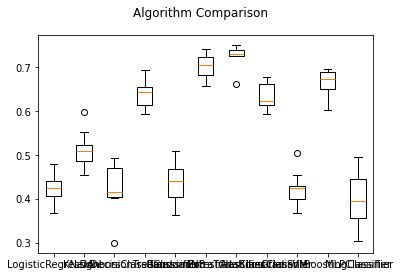

In [17]:
def plot_models(results, names):
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
plot_models(results, names)

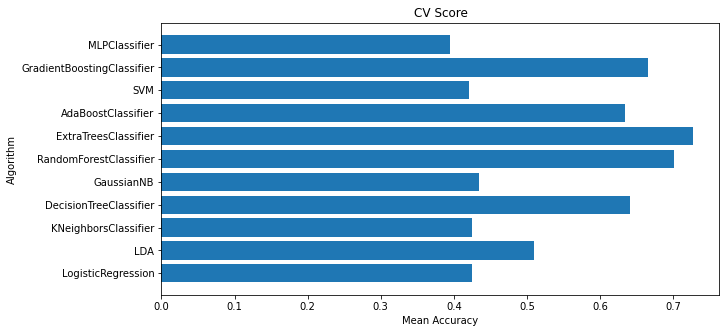

In [18]:
means = np.array(results).mean(axis=1)
fig = plt.figure(figsize=(10, 5))
# creating the bar plot
plt.barh(names,means)
plt.xlabel("Mean Accuracy")
plt.ylabel("Algorithm")
plt.title("CV Score")
plt.show()


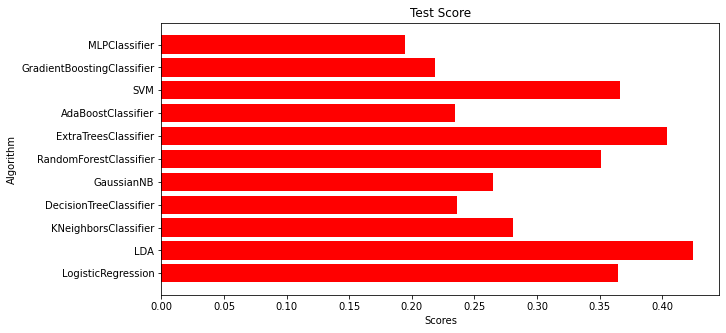

In [19]:
fig = plt.figure(figsize=(10, 5))
# creating the bar plot
plt.barh(names,scores,color='r')
plt.xlabel("Scores")
plt.ylabel("Algorithm")
plt.title("Test Score")
plt.show()

In [20]:
#LogisticRegression 	LMz6XaxP7FaH5uUuJbRyeEuQ2XGadC84Cu 	KNeighborsClassifier 	DecisionTreeClassifier 	GaussianNB 	RandomForestClassifier 	ExtraTreesClassifier 	AdaBoostClassifier 	SVM 	GradientBoostingClassifier 	MLPClassifier
out_puts=output.copy()

datas={
    "signal":out_puts.LDA.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_LDA=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_LDA)):
    if a == 1 and sample_eval_LDA.signal[i] == 1 or a == -1 and sample_eval_LDA.signal[i] == -1:
        sample_eval_LDA.signal[i] = 0
    elif a == -1 and sample_eval_LDA.signal[i] == 1 or a == 1 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == 1:       
        sample_eval_LDA.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_LDA)
print("LDA","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.KNeighborsClassifier.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_KNN=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_KNN)):
    if a == 1 and sample_eval_KNN.signal[i] == 1 or a == -1 and sample_eval_KNN.signal[i] == -1:
        sample_eval_KNN.signal[i] = 0
    elif a == -1 and sample_eval_KNN.signal[i] == 1 or a == 1 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == 1:       
        sample_eval_KNN.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_KNN)
print("KNN","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.DecisionTreeClassifier.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_Dtree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Dtree)):
    if a == 1 and sample_eval_Dtree.signal[i] == 1 or a == -1 and sample_eval_Dtree.signal[i] == -1:
        sample_eval_Dtree.signal[i] = 0
    elif a == -1 and sample_eval_Dtree.signal[i] == 1 or a == 1 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == 1:       
        sample_eval_Dtree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Dtree)
print("Dtree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.GaussianNB.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_GausianNB=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GausianNB)):
    if a == 1 and sample_eval_GausianNB.signal[i] == 1 or a == -1 and sample_eval_GausianNB.signal[i] == -1:
        sample_eval_GausianNB.signal[i] = 0
    elif a == -1 and sample_eval_GausianNB.signal[i] == 1 or a == 1 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == 1:       
        sample_eval_GausianNB.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GausianNB)
print("GausianNB","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.RandomForestClassifier.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_RF=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_RF)):
    if a == 1 and sample_eval_RF.signal[i] == 1 or a == -1 and sample_eval_RF.signal[i] == -1:
        sample_eval_RF.signal[i] = 0
    elif a == -1 and sample_eval_RF.signal[i] == 1 or a == 1 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == 1:       
        sample_eval_RF.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_RF)
print("RF","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.ExtraTreesClassifier.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_Etree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Etree)):
    if a == 1 and sample_eval_Etree.signal[i] == 1 or a == -1 and sample_eval_Etree.signal[i] == -1:
        sample_eval_Etree.signal[i] = 0
    elif a == -1 and sample_eval_Etree.signal[i] == 1 or a == 1 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == 1:       
        sample_eval_Etree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Etree)
print("Etree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.AdaBoostClassifier.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_AdaBoot=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_AdaBoot)):
    if a == 1 and sample_eval_AdaBoot.signal[i] == 1 or a == -1 and sample_eval_AdaBoot.signal[i] == -1:
        sample_eval_AdaBoot.signal[i] = 0
    elif a == -1 and sample_eval_AdaBoot.signal[i] == 1 or a == 1 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == 1:       
        sample_eval_AdaBoot.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_AdaBoot)
print("AdaBoot","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.GradientBoostingClassifier.tolist(),
    "close":out_puts.Close_x.tolist(),
    "Date":out_puts.Date.tolist()
}
sample_eval_GBooting=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GBooting)):
    if a == 1 and sample_eval_GBooting.signal[i] == 1 or a == -1 and sample_eval_GBooting.signal[i] == -1:
        sample_eval_GBooting.signal[i] = 0
    elif a == -1 and sample_eval_GBooting.signal[i] == 1 or a == 1 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == 1:       
        sample_eval_GBooting.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GBooting)
print("GBooting","profit:", profit,"\nwin_rate:", win_rate)

LDA profit: 4.3768 
win_rate: 0.4732
KNN profit: 10.2215 
win_rate: 0.5828
Dtree profit: 1197.5912 
win_rate: 0.9333
GausianNB profit: 1.0524 
win_rate: 0.4747
RF profit: 1197.5912 
win_rate: 0.9333
Etree profit: 1197.5912 
win_rate: 0.9333
AdaBoot profit: 1197.5912 
win_rate: 0.9333
GBooting profit: 443.588 
win_rate: 0.7627


In [22]:
import finplot as fplt

# CREATE A TICKER INSTANCE FOR TESLA
#Rasad = yf.Ticker('TSLA')

# RETRIEVE 1 YEAR WORTH OF DAILY DATA OF TESLA
#df = Rasad.history(interval='1d',period='1y')

# PLOT THE OHLC CANDLE CHART
aa=train1[['Open_x','Close_x','High_x','Low_x','Date']]
ab=sample_eval_GBooting
aa=ab.merge(aa, left_on='Date', right_on='Date')

fplt.candlestick_ochl(aa[['Open_x','Close_x','High_x','Low_x']])
#train1['AdaBoostClassifier']=sample_eval_AdaBoot['signal']
lo_wicks=sample_eval_GBooting['signal']
aa.loc[(lo_wicks==1),'marker'] = aa['Close_x']
fplt.plot(aa.index, aa['marker'],color='navy', style='^', legend='dumb mark', markersize=10)
aa.loc[(lo_wicks==-1),'marker1'] = aa['Close_x']
fplt.plot(aa.index, aa['marker1'],color='lawngreen', style='v', legend='dumb mark', markersize=10)

#fplt.plot(a , color='black', legend='Log price')
fplt.show()

 - Assuming time column is missing and using index instead.


In [23]:
out_puts1=output1.copy()

#LogisticRegression 	LMz6XaxP7FaH5uUuJbRyeEuQ2XGadC84Cu 	KNeighborsClassifier 	DecisionTreeClassifier 	GaussianNB 	RandomForestClassifier 	ExtraTreesClassifier 	AdaBoostClassifier 	SVM 	GradientBoostingClassifier 	MLPClassifier


datas={
    "signal":out_puts1.LDA.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_LDA=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_LDA)):
    if a == 1 and sample_eval_LDA.signal[i] == 1 or a == -1 and sample_eval_LDA.signal[i] == -1:
        sample_eval_LDA.signal[i] = 0
    elif a == -1 and sample_eval_LDA.signal[i] == 1 or a == 1 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == 1:       
        sample_eval_LDA.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_LDA)
print("LDA","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.KNeighborsClassifier.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_KNN=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_KNN)):
    if a == 1 and sample_eval_KNN.signal[i] == 1 or a == -1 and sample_eval_KNN.signal[i] == -1:
        sample_eval_KNN.signal[i] = 0
    elif a == -1 and sample_eval_KNN.signal[i] == 1 or a == 1 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == 1:       
        sample_eval_KNN.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_KNN)
print("KNN","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.DecisionTreeClassifier.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_Dtree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Dtree)):
    if a == 1 and sample_eval_Dtree.signal[i] == 1 or a == -1 and sample_eval_Dtree.signal[i] == -1:
        sample_eval_Dtree.signal[i] = 0
    elif a == -1 and sample_eval_Dtree.signal[i] == 1 or a == 1 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == 1:       
        sample_eval_Dtree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Dtree)
print("Dtree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.GaussianNB.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_GausianNB=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GausianNB)):
    if a == 1 and sample_eval_GausianNB.signal[i] == 1 or a == -1 and sample_eval_GausianNB.signal[i] == -1:
        sample_eval_GausianNB.signal[i] = 0
    elif a == -1 and sample_eval_GausianNB.signal[i] == 1 or a == 1 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == 1:       
        sample_eval_GausianNB.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GausianNB)
print("GausianNB","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.RandomForestClassifier.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_RF=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_RF)):
    if a == 1 and sample_eval_RF.signal[i] == 1 or a == -1 and sample_eval_RF.signal[i] == -1:
        sample_eval_RF.signal[i] = 0
    elif a == -1 and sample_eval_RF.signal[i] == 1 or a == 1 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == 1:       
        sample_eval_RF.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_RF)
print("RF","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.ExtraTreesClassifier.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_Etree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Etree)):
    if a == 1 and sample_eval_Etree.signal[i] == 1 or a == -1 and sample_eval_Etree.signal[i] == -1:
        sample_eval_Etree.signal[i] = 0
    elif a == -1 and sample_eval_Etree.signal[i] == 1 or a == 1 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == 1:       
        sample_eval_Etree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Etree)
print("Etree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.AdaBoostClassifier.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_AdaBoot=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_AdaBoot)):
    if a == 1 and sample_eval_AdaBoot.signal[i] == 1 or a == -1 and sample_eval_AdaBoot.signal[i] == -1:
        sample_eval_AdaBoot.signal[i] = 0
    elif a == -1 and sample_eval_AdaBoot.signal[i] == 1 or a == 1 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == 1:       
        sample_eval_AdaBoot.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_AdaBoot)
print("AdaBoot","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.GradientBoostingClassifier.tolist(),
    "close":out_puts1.Close_x.tolist(),
    "Date":out_puts1.Date.tolist()
    
}
sample_eval_GBooting=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GBooting)):
    if a == 1 and sample_eval_GBooting.signal[i] == 1 or a == -1 and sample_eval_GBooting.signal[i] == -1:
        sample_eval_GBooting.signal[i] = 0
    elif a == -1 and sample_eval_GBooting.signal[i] == 1 or a == 1 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == 1:       
        sample_eval_GBooting.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GBooting)
print("GBooting","profit:", profit,"\nwin_rate:", win_rate)


LDA profit: 1.5572 
win_rate: 0.625
KNN profit: 0.8828 
win_rate: 0.6111
Dtree profit: 0.2332 
win_rate: 0.5
GausianNB profit: 0.813 
win_rate: 0.5
RF profit: 0.4273 
win_rate: 0.4
Etree profit: 0.82 
win_rate: 0.3947
AdaBoot profit: 0.1271 
win_rate: 0.4839
GBooting profit: 1.9654 
win_rate: 0.8


In [46]:
# CREATE A TICKER INSTANCE FOR TESLA
#Rasad = yf.Ticker('TSLA')

# RETRIEVE 1 YEAR WORTH OF DAILY DATA OF TESLA
#df = Rasad.history(interval='1d',period='1y')

# PLOT THE OHLC CANDLE CHART
aa=valid1[['Open_x','Close_x','High_x','Low_x','Date']]
ab=sample_eval_GBooting
aa=ab.merge(aa, left_on='Date', right_on='Date')

fplt.candlestick_ochl(aa[['Open_x','Close_x','High_x','Low_x']])
#train1['AdaBoostClassifier']=sample_eval_AdaBoot['signal']
lo_wicks=sample_eval_GBooting['signal']
aa.loc[(lo_wicks==1),'marker'] = aa['Close_x']
fplt.plot(aa.index, aa['marker'],color='navy', style='^', legend='dumb mark')
aa.loc[(lo_wicks==-1),'marker1'] = aa['Close_x']
fplt.plot(aa.index, aa['marker1'],color='lawngreen', style='v', legend='dumb mark')

#fplt.plot(a , color='black', legend='Log price')
fplt.show()

 - Assuming time column is missing and using index instead.


In [24]:
L=[-1]
for i in range(len(valid1)-2):
    L.append(0)
L.append(1)

datas={
    "signal":L,
    "close":valid1.Close_x.tolist() 
}
y1=pd.DataFrame(datas)
profit, win_rate = eval_strategy(y1)
print("profit:", profit,"\nwin_rate:", win_rate)

profit: 1.1443 
win_rate: 1.0


In [25]:
datas={
    "signal":valid1.target1.tolist(),
    "close":valid1.Close_x.tolist() 
}
y1=pd.DataFrame(datas)
profit, win_rate = eval_strategy(y1)
print("profit:", profit,"\nwin_rate:", win_rate)

profit: 24.2683 
win_rate: 0.9474
